### @ Univariate Analysis, Bivariate Analysis and Plotting Different distributions of data 

In [1]:
# Generating and plotting Normal Distribution

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Creating Normal Distribution data points
no_of_pts, mu, sigma = 1000, 0, 5
x = np.random.normal(mu, sigma, no_of_pts)

In [2]:
data = pd.read_csv('data/flights.csv')
print(data.shape)

data = data[data['arr_delay'] < 500]
print(data.shape)

data.head()
# np.mean(x)

(336776, 16)
(327295, 16)


,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,544.0,-1.0,1004.0,-18.0,B6,N804JB,725,JFK,BQN,183.0,1576,5.0,44.0
4,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0


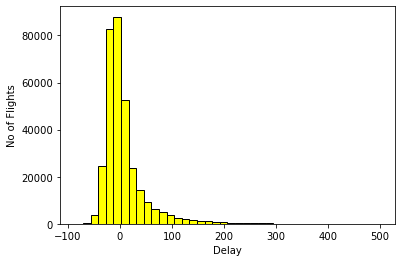

In [8]:
plt.hist(data['arr_delay'], color='yellow', bins=40, edgecolor='black')
plt.xlabel('Delay')
plt.ylabel('No of Flights')
plt.show()

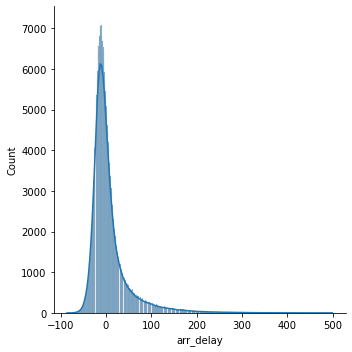

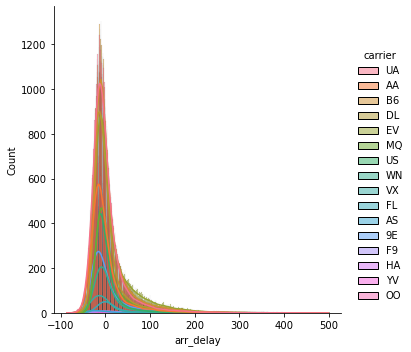

In [11]:
# Plotting an histogram for 'arr_delay' along with its pdf 
sns.displot(data, x='arr_delay', kind='hist', kde=True )

# Plotting an histogram for 'arr_delay' along with its pdf for different 'carrier'
sns.displot(data, x='arr_delay', hue='carrier', kind='hist', kde=True )

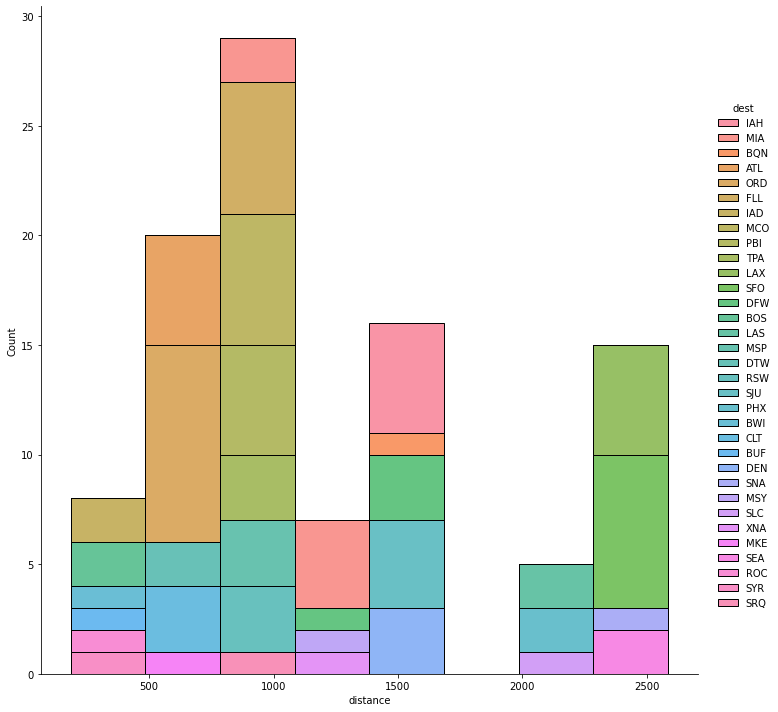

In [45]:
## Plotting histogram for 'distance' variable

sns.displot(data.iloc[:100], x='distance', hue='dest', kind='hist', multiple="stack", height=10)

In [133]:
data['carrier'].value_counts()

UA    57782
B6    54049
EV    51105
DL    47634
AA    31936
MQ    25032
US    19831
9E    17293
WN    12044
VX     5114
FL     3172
AS      709
F9      680
YV      544
HA      341
OO       29
Name: carrier, dtype: int64

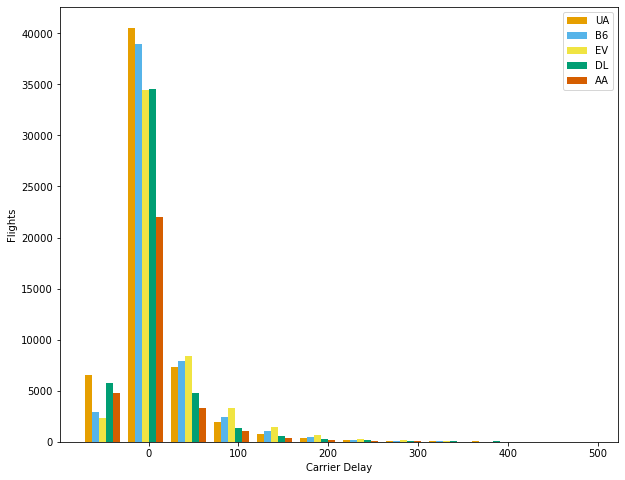

In [52]:
## Plotting histogram plot for flights with 'arr_delay' for different categories of carrier
# Side-by-Side Histograms

colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
carrier = ['UA', 'B6', 'EV', 'DL', 'AA']

ls = [data[data['carrier'] == m]['arr_delay'] for m in carrier]
plt.figure(figsize=(10,8))
plt.hist(ls, bins= int(180/15), color=colors, label=carrier )
plt.xlabel('Carrier Delay')
plt.ylabel('Flights')
plt.legend()
plt.show()

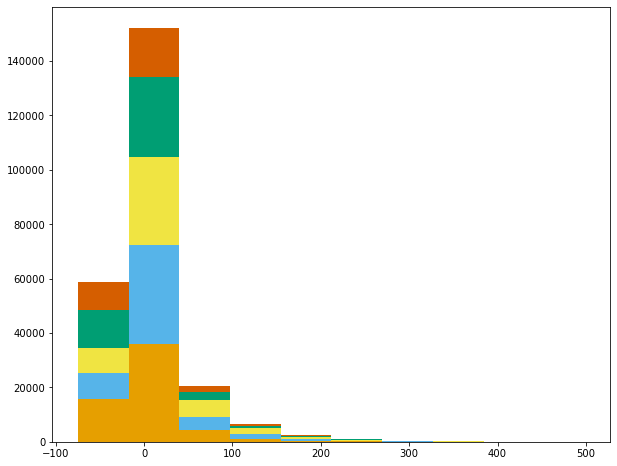

In [151]:
## Plotting : Stacked Bars

plt.figure(figsize=(10,8))
plt.hist(ls, stacked=True, label=carrier, color=colors)
plt.show()

In [153]:
# sns.distplot(data, x = 'arr_delay')
data.columns

Index(['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time',
       'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest',
       'air_time', 'distance', 'hour', 'minute'],
      dtype='object')

In [176]:
print(data.head())
# data.dest.unique()
data.carrier.unique()

   year  month  day  dep_time  dep_delay  arr_time  arr_delay carrier tailnum  \
0  2013      1    1     517.0        2.0     830.0       11.0      UA  N14228   
1  2013      1    1     533.0        4.0     850.0       20.0      UA  N24211   
2  2013      1    1     542.0        2.0     923.0       33.0      AA  N619AA   
3  2013      1    1     544.0       -1.0    1004.0      -18.0      B6  N804JB   
4  2013      1    1     554.0       -6.0     812.0      -25.0      DL  N668DN   

   flight origin dest  air_time  distance  hour  minute  
0    1545    EWR  IAH     227.0      1400   5.0    17.0  
1    1714    LGA  IAH     227.0      1416   5.0    33.0  
2    1141    JFK  MIA     160.0      1089   5.0    42.0  
3     725    JFK  BQN     183.0      1576   5.0    44.0  
4     461    LGA  ATL     116.0       762   5.0    54.0  


array(['UA', 'AA', 'B6', 'DL', 'EV', 'MQ', 'US', 'WN', 'VX', 'FL', 'AS',
       '9E', 'F9', 'HA', 'YV', 'OO'], dtype=object)

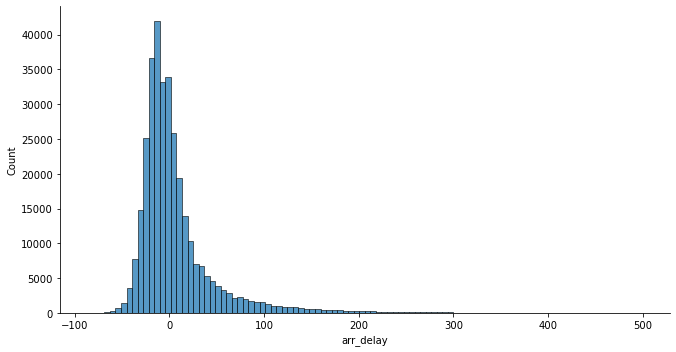

In [160]:
sns.displot(data, x = 'arr_delay', kind='hist', bins=100, aspect=1.9 )

In [ ]:
sns.displot(data, x='arr_delay', hue='carrier', kind='kde', aspect=1.9)

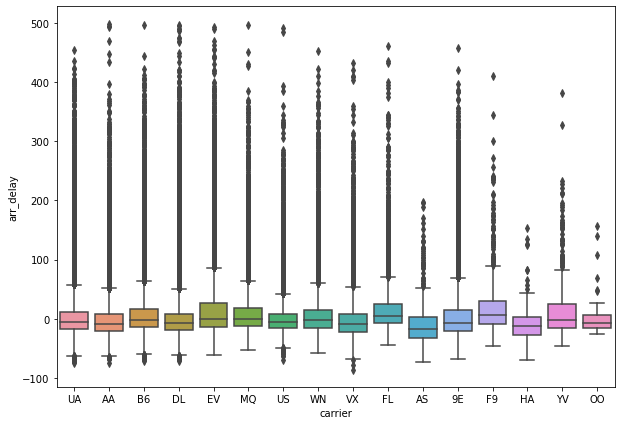

In [60]:
plt.figure(figsize=(10,7))
sns.boxplot(x='carrier', y='arr_delay', data=data)
plt.show()

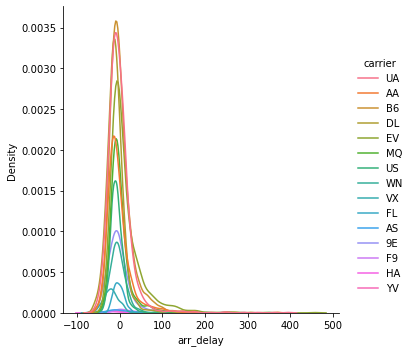

In [65]:
sns.displot(data.iloc[:10000, :], x='arr_delay', hue='carrier', kind='kde')

### Different distribution of plots

In [1]:
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

np.random.seed(34)

In [2]:
data = pd.DataFrame({ 'beta': np.random.beta(5, 1, 1000) * 60,        # beta
                        'exponential': np.random.exponential(10, 1000), # exponential
                        'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
                        'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
                    })

In [6]:
# make bimodal distribution
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

data['bimodal'] = bimodal

# create list of column names to use later
col_names = list(data.columns)

In [11]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
data['normal_big'] = normal_big

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   beta         1000 non-null   float64
 1   exponential  1000 non-null   float64
 2   normal_p     1000 non-null   float64
 3   normal_l     1000 non-null   float64
 4   bimodal      1000 non-null   float64
 5   normal_big   1000 non-null   float64
dtypes: float64(6)
memory usage: 47.0 KB


In [16]:
data.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,50.024249,10.028387,9.994006,10.175745,-0.102074,1.000197e+06
std,8.474545,9.733928,2.013971,10.104004,20.184312,9.779393e+03
min,13.854022,0.007617,2.356844,-19.539980,-28.722698,9.699417e+05
25%,45.793283,2.951421,8.687478,3.566822,-20.246600,9.931930e+05
50%,52.337504,7.018565,9.983498,10.326331,-1.247216,1.000034e+06
75%,56.722191,14.022485,11.306914,16.615057,19.873459,1.006937e+06
max,59.990640,71.344341,16.214364,42.072915,29.485519,1.031025e+06


In [12]:
data.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,39.273740,2.263890,11.860245,4.748207,18.908713,1.006198e+06
1,55.030395,13.108592,11.796582,10.959172,22.164899,9.853064e+05
2,47.434682,3.312019,11.146945,3.919227,21.272005,9.953588e+05
3,43.173536,17.664301,8.266689,42.072915,19.347161,9.903315e+05
4,45.681443,2.109760,5.112983,16.960664,20.535368,9.954204e+05


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


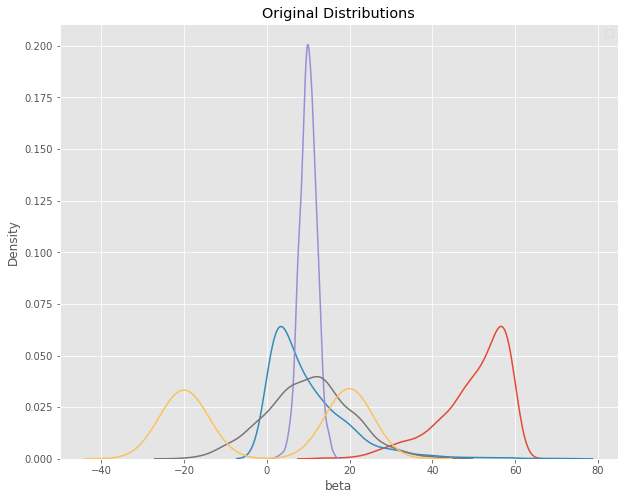

In [18]:
# plot original distribution plot
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('Original Distributions')

sns.kdeplot(data['beta'], ax=ax1)
sns.kdeplot(data['exponential'], ax=ax1)
sns.kdeplot(data['normal_p'], ax=ax1)
sns.kdeplot(data['normal_l'], ax=ax1)
sns.kdeplot(data['bimodal'], ax=ax1)
# sns.kdeplot(data['normal_big'], ax=ax1)
plt.legend()


In [19]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
rbst_scaler = RobustScaler()

min_max_trns = min_max_scaler.fit_transform(data)
std_trans = std_scaler.fit_transform(data)
rbst_trans = rbst_scaler.fit_transform(data)

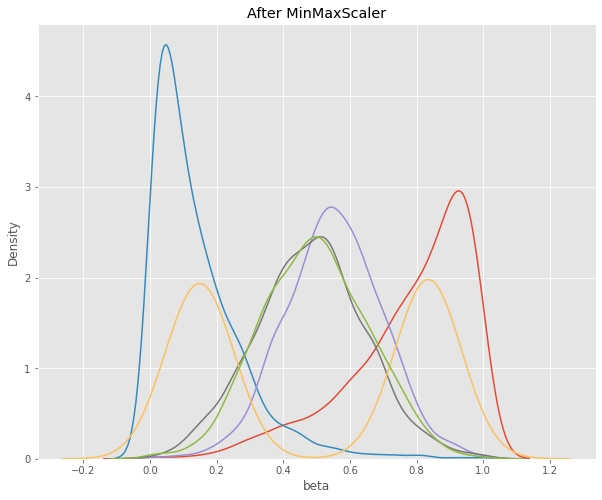

In [20]:
min_max_trns = pd.DataFrame(min_max_trns, columns=data.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After MinMaxScaler')

sns.kdeplot(min_max_trns['beta'], ax=ax1)
sns.kdeplot(min_max_trns['exponential'], ax=ax1)
sns.kdeplot(min_max_trns['normal_p'], ax=ax1)
sns.kdeplot(min_max_trns['normal_l'], ax=ax1)
sns.kdeplot(min_max_trns['bimodal'], ax=ax1)
sns.kdeplot(min_max_trns['normal_big'], ax=ax1);

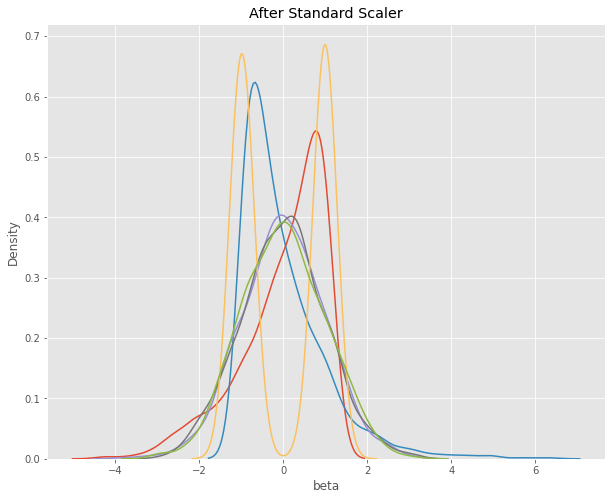

In [23]:
std_trans = pd.DataFrame(std_trans, columns=data.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Standard Scaler')

sns.kdeplot(std_trans['beta'], ax=ax1)
sns.kdeplot(std_trans['exponential'], ax=ax1)
sns.kdeplot(std_trans['normal_p'], ax=ax1)
sns.kdeplot(std_trans['normal_l'], ax=ax1)
sns.kdeplot(std_trans['bimodal'], ax=ax1)
sns.kdeplot(std_trans['normal_big'], ax=ax1);

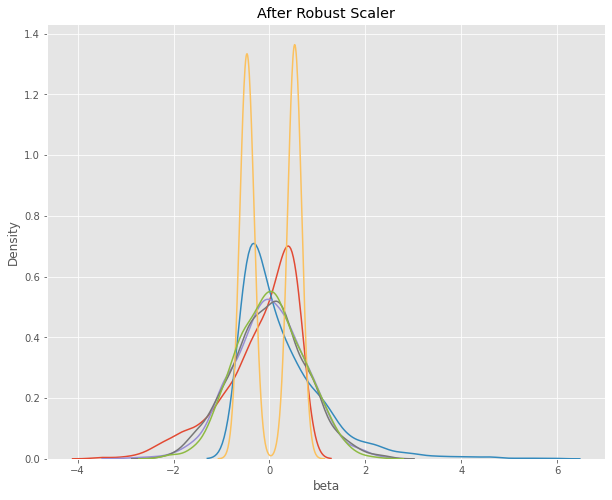

In [22]:
rbst_trans
rbst_trans = pd.DataFrame(rbst_trans, columns=data.columns)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After Robust Scaler')

sns.kdeplot(rbst_trans['beta'], ax=ax1)
sns.kdeplot(rbst_trans['exponential'], ax=ax1)
sns.kdeplot(rbst_trans['normal_p'], ax=ax1)
sns.kdeplot(rbst_trans['normal_l'], ax=ax1)
sns.kdeplot(rbst_trans['bimodal'], ax=ax1)
sns.kdeplot(rbst_trans['normal_big'], ax=ax1);